
# Data Mining and Probabilistic Reasoning, WS19/20

## Dr. Gjergji Kasneci, The University of Tübingen

#Data Preparation
---


Date 18/11/2019

Vadim (vadim.borisov@uni-tuebingen.de)





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions


ModuleNotFoundError: No module named 'mlxtend'

In [0]:
from sklearn.datasets import load_iris

In [0]:
data = load_iris()

In [0]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

![alt text](https://i.ytimg.com/vi/ywIWUfjPCyY/maxresdefault.jpg)

In [0]:
X, y = data['data'], data['target']

In [0]:
def train_and_plot_knn(X,y,n_neighbors):
  model = KNeighborsClassifier(n_neighbors = n_neighbors, n_jobs=-1)
  model.fit(X,y)
  plot_decision_regions(X, y, clf=model)

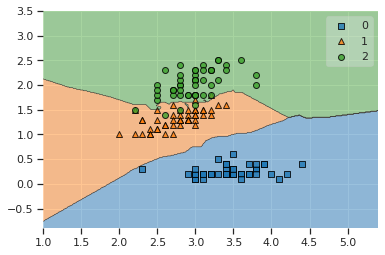

In [0]:
train_and_plot_knn(X[:,[1,3]],y, n_neighbors=3)

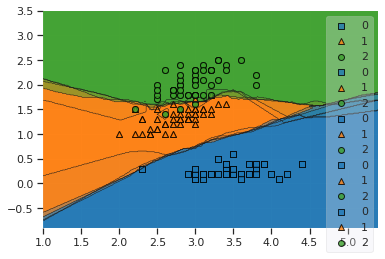

In [0]:
for i in range(1, 10, 2):
  train_and_plot_knn(X[:,[1,3]],y, i)

Machine Learning in Three Steps! 
```python
# 3 steps
X,y = load_data()
train_ml(X,y)
estimate(new_data) 
```

![alt text](https://i.ibb.co/xGSjGpT/meme.png)

# German Credit Risk


The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. 

 - Age (numeric)
 - Sex (text: male, female)
 - Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
 - Housing (text: own, rent, or free)
 - Saving accounts (text - little, moderate, quite rich, rich)
 - Checking account (numeric, in DM - Deutsch Mark)
 - Credit amount (numeric, in DM)
 - Duration (numeric, in month)
 - Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [0]:
link_2 = 'https://raw.githubusercontent.com/unnir/data_science_tutorials_uni/master/tutorial_2/data/german_credit_data.csv?token=AAKIG6R2UBJSJ6VC5W2PSIK52KCS4'
df = pd.read_csv(link_2, index_col=0)

In [0]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [0]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None


In [0]:
df.describe()


,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [0]:
df.describe(include=['object'])


,Sex,Housing,Saving accounts,Checking account,Purpose,Risk
count,1000,1000,817,606,1000,1000
unique,2,3,4,3,8,2
top,male,own,little,little,car,good
freq,690,713,603,274,337,700


In [0]:
print("Unique values in each categorical column:")
for col in df.select_dtypes(include=[object]):
    print(col,":", df[col].unique())

Unique values in each categorical column:
Sex : ['male' 'female']
Housing : ['own' 'free' 'rent']
Saving accounts : [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account : ['little' 'moderate' nan 'rich']
Purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Risk : ['good' 'bad']


In [0]:
df['Housing'].value_counts() # normalize=True

own     713
rent    179
free    108
Name: Housing, dtype: int64

In [0]:
df['Credit amount'].mean() # std, max, min 


3271.258

In [0]:
ages1 = df.loc[df['Housing'] == 'own', 'Age']
ages2 = df.loc[df['Housing'] == 'rent', 'Age']
print("The average age of the property owners: {0} +- {1} years, \n or who just rent a flat: {2} +- {3} years.".format(
    round(ages1.mean()), round(ages1.std(), 1),
    round(ages2.mean()), round(ages2.std(), 1)))


The average age of the property owners: 36 +- 10.8 years, 
 or who just rent a flat: 30 +- 10.2 years.


# Exploratory Data Analysis (EDA)
There is no data analysis without data aggregation.

In [0]:
df.groupby('Sex').mean()

,Age,Job,Credit amount,Duration
Sex,,,,
female,32.803226,1.835484,2877.774194,19.43871
male,36.778261,1.934783,3448.040580,21.56087


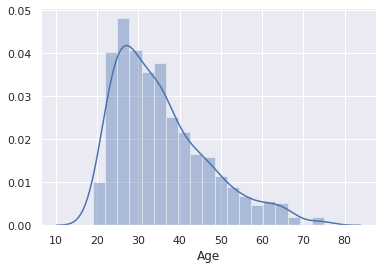

In [0]:
# how the feature "Age" is distributed.
sns.distplot(df["Age"])


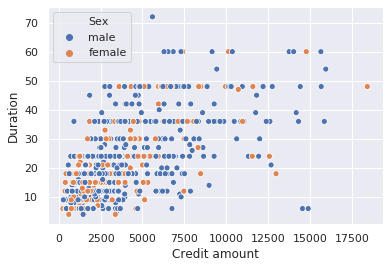

In [0]:
 sns.scatterplot(x="Credit amount",y="Duration", hue='Sex', data=df)

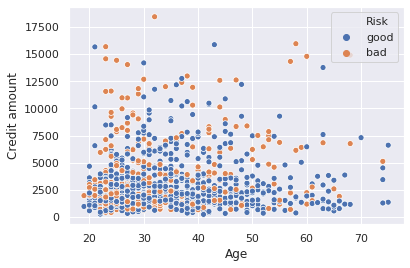

In [0]:
 sns.scatterplot(x="Age",y="Credit amount", hue='Risk', data=df)

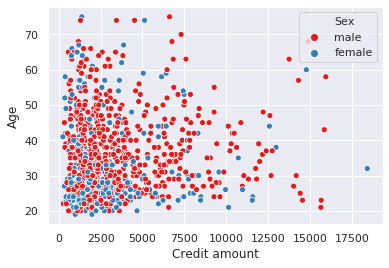

In [0]:
sns.scatterplot(x="Credit amount",y="Age", hue="Sex", data=df, palette="Set1")


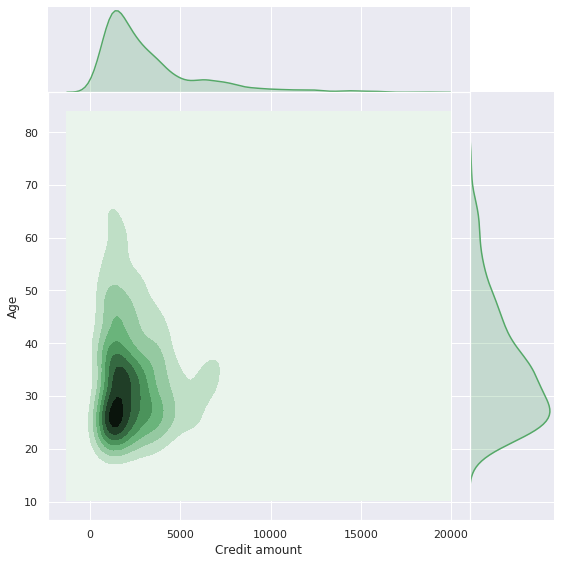

In [0]:
sns.jointplot("Credit amount", "Age", data=df, kind="kde", space=0, color="g",  height=8)

In [0]:
# Question: Why EDA is useful? 

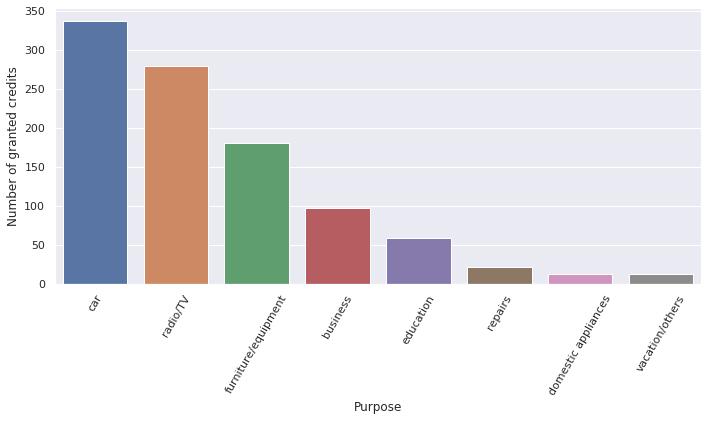

In [0]:
n_credits = df.groupby("Purpose")["Age"].count().rename("Count").reset_index()
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="Purpose",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Number of granted credits")
plt.tight_layout()

**Understanding Boxplots**

![alt text](https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png)

In [0]:
def boxes(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(10,6))
    box = sns.boxplot(x=x,y=y, hue=h, data=df)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

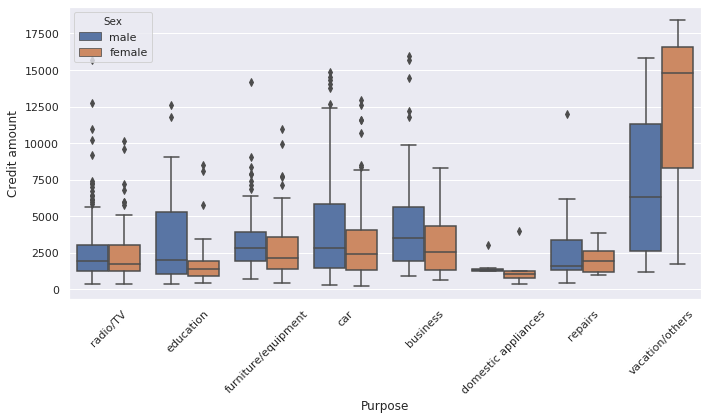

In [0]:
boxes("Purpose","Credit amount","Sex")


In [0]:
# sns.countplot(x='Risk', hue='Job', data=df)


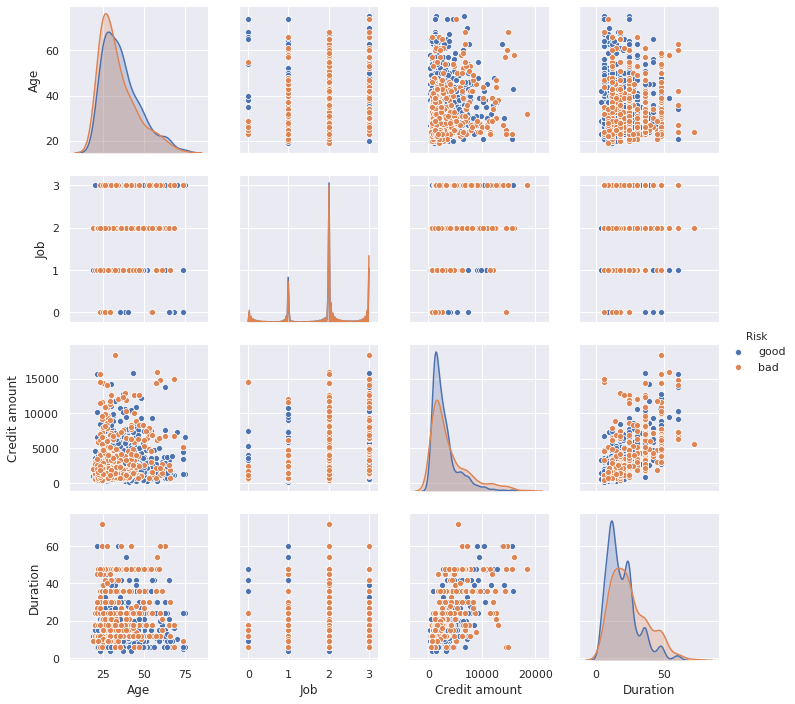

In [0]:
# we can combine plots together. 
sns.pairplot(df,hue='Risk')


In [0]:
# Question: Why do we see only 4 features?

In [0]:
df.shape 

(1000, 10)

In [0]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [0]:
# factorize the feature 
df.Sex = df.Sex.factorize()[0]

In [0]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,0,2,own,NaN,little,1169,6,radio/TV,good
1,22,1,2,own,little,moderate,5951,48,radio/TV,bad
2,49,0,1,own,little,NaN,2096,12,education,good
3,45,0,2,free,little,little,7882,42,furniture/equipment,good
4,53,0,2,free,little,little,4870,24,car,bad


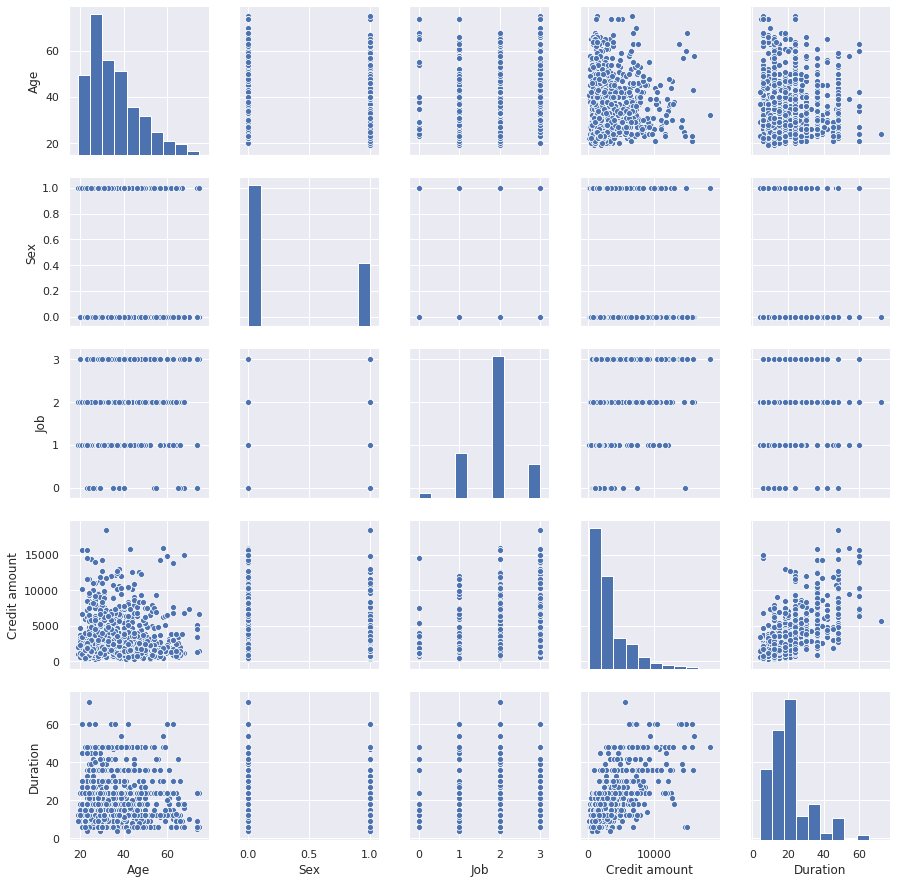

In [0]:
sns.pairplot(df)

In [0]:
df.Risk = df.Risk.factorize()[0]

In [0]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,0,2,own,NaN,little,1169,6,radio/TV,0
1,22,1,2,own,little,moderate,5951,48,radio/TV,1
2,49,0,1,own,little,NaN,2096,12,education,0
3,45,0,2,free,little,little,7882,42,furniture/equipment,0
4,53,0,2,free,little,little,4870,24,car,1


(4.0, 0.0)

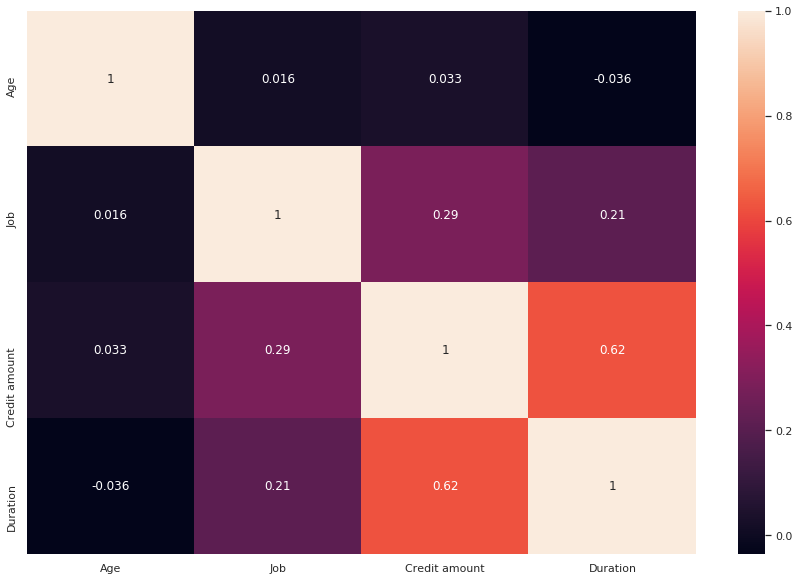

In [0]:
plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(), annot=True,)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top -0.5)


In [0]:
# Question: 
# - Is it good to have a higly correlated features with a target variable?

# Categorical Data 

In [0]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [0]:
# Question: What can we do with categorical data? 

In [0]:
cat_features = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

In [0]:
df[cat_features]

,Sex,Housing,Saving accounts,Checking account,Purpose
0,0,own,little,little,radio/TV
1,1,own,little,moderate,radio/TV
2,0,own,little,little,education
3,0,free,little,little,furniture/equipment
4,0,free,little,little,car
...,...,...,...,...,...
995,1,own,little,little,furniture/equipment
996,0,own,little,little,car
997,0,own,little,little,radio/TV
998,0,free,little,little,radio/TV


In [0]:
df[cat_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 5 columns):
Sex                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     1000 non-null object
Checking account    1000 non-null object
Purpose             1000 non-null object
dtypes: int64(1), object(4)
memory usage: 46.9+ KB


In [0]:
df[cat_features].describe()

,Sex
count,1000.000000
mean,0.310000
std,0.462725
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [0]:
from sklearn.preprocessing import OneHotEncoder

In [0]:
# OneHotEncoder?

In [0]:
encoder = OneHotEncoder(sparse=False)
tmp_var = encoder.fit_transform(df['Sex'].values.reshape(-1,1))
df['tmp'] = tmp_var[:,0]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [0]:
tmp_var

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [0]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,tmp
0,67,0,2,own,little,little,1169,6,radio/TV,good,1.0
1,22,1,2,own,little,moderate,5951,48,radio/TV,bad,0.0
2,49,0,1,own,little,little,2096,12,education,good,1.0
3,45,0,2,free,little,little,7882,42,furniture/equipment,good,1.0
4,53,0,2,free,little,little,4870,24,car,bad,1.0


In [0]:
df = df.fillna(df.mode().iloc[0])

In [0]:
for iCat_feature in cat_features:
  encoder = OneHotEncoder(sparse=False)
  tmp_var = encoder.fit_transform(df[iCat_feature].values.reshape(-1,1))
  for cnt, i in enumerate(df[iCat_feature].unique()):
    df[iCat_feature + '_'+str(cnt)] = tmp_var[:,0]
  del tmp_var 

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [0]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,tmp,Sex_0,Sex_1,Housing_0,Housing_1,Housing_2,Saving accounts_0,Saving accounts_1,Saving accounts_2,Saving accounts_3,Checking account_0,Checking account_1,Checking account_2,Purpose_0,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_7
0,67,0,2,own,little,little,1169,6,radio/TV,good,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,22,1,2,own,little,moderate,5951,48,radio/TV,bad,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,0,1,own,little,little,2096,12,education,good,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,45,0,2,free,little,little,7882,42,furniture/equipment,good,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53,0,2,free,little,little,4870,24,car,bad,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(26.0, 0.0)

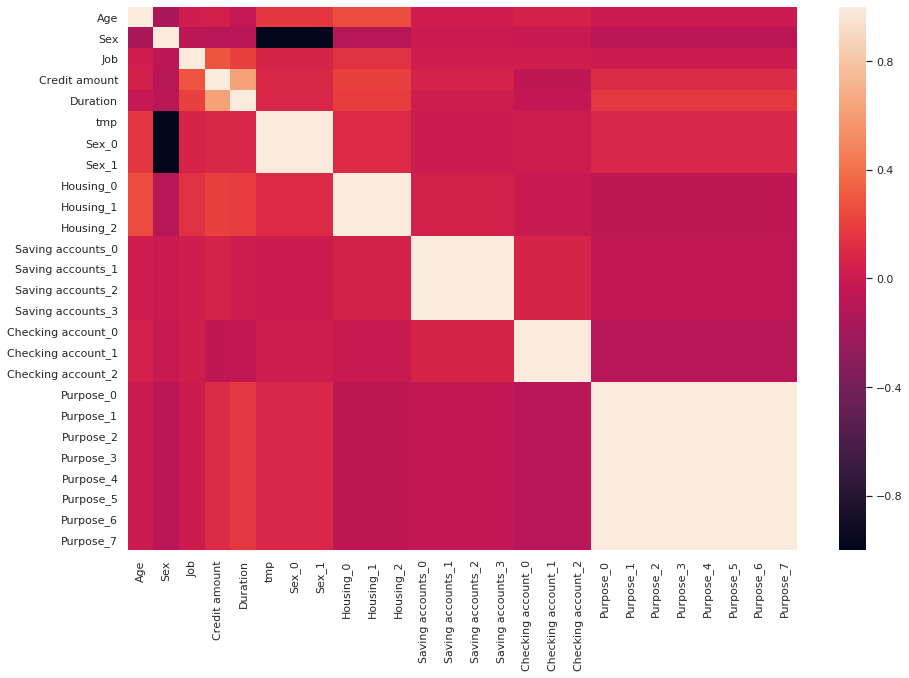

In [0]:
plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(),)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top -0.5)

https://datascience.stackexchange.com/questions/893/how-to-get-correlation-between-two-categorical-variable-and-a-categorical-variab

# Handle Missing Data (NaNs) with Python 


In [0]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,tmp,Sex_0,Sex_1,Housing_0,Housing_1,Housing_2,Saving accounts_0,Saving accounts_1,Saving accounts_2,Saving accounts_3,Checking account_0,Checking account_1,Checking account_2,Purpose_0,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_7
0,67,0,2,own,little,little,1169,6,radio/TV,good,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,22,1,2,own,little,moderate,5951,48,radio/TV,bad,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,0,1,own,little,little,2096,12,education,good,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,45,0,2,free,little,little,7882,42,furniture/equipment,good,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53,0,2,free,little,little,4870,24,car,bad,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# Question: How would you approach this problem?

# Pos. answers: 
# Remove Rows, Columns 
# Impute (mean, mode, constant, estimations)
# guess from the rest of the data

In [0]:
# you can replace mode with mean, etc
df = df.fillna(df.mode().iloc[0])

# Now we can train our ML model on a real data.  

In [0]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,tmp,Sex_0,Sex_1,Housing_0,Housing_1,Housing_2,Saving accounts_0,Saving accounts_1,Saving accounts_2,Saving accounts_3,Checking account_0,Checking account_1,Checking account_2,Purpose_0,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_7
0,67,0,2,own,little,little,1169,6,radio/TV,good,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,22,1,2,own,little,moderate,5951,48,radio/TV,bad,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,0,1,own,little,little,2096,12,education,good,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,45,0,2,free,little,little,7882,42,furniture/equipment,good,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53,0,2,free,little,little,4870,24,car,bad,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
model = KNeighborsClassifier(n_neighbors=3)
X, y = df.drop(cat_features+['Risk',], 1), df.Risk
model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
model.predict([list(range(25)),])

array(['good'], dtype=object)